<a href="https://colab.research.google.com/github/yeahjinjeong/ITmining2022/blob/main/8%EC%A1%B0_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC_%EB%B0%8F_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 구글 스토어 데이터를 활용하여 앱 내 광고 유무에 영향을 미치는 요소 찾기

## 8조
산업디자인과 1816650 김민지

소비자경제학과 2113899 오현아

문화관광학전공 1814966 이상화

홍보광고학과 1910940 정예진

## 데이터 탐색 및 전처리

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


모든 열 보이기 설정

In [ ]:
pd.set_option('display.max_columns', None)

google 변수에 데이터프레임 불러오기

In [ ]:
google = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Google-Playstore.csv")

google 은 수정 전 용도,

수정할 용도로 gps 변수에 google 데이터 프레임 복사

In [ ]:
gps = google
display(gps)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.3,16775.0,"100,000+",100000.0,337109,True,0.0,USD,77M,4.1 and up,ALICE GAME,http://www.4399sy.com.hk/,ssjjcomhk@gmail.com,NaN,"Jun 01, 2021",Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,USD,44M,4.1 and up,"3Dream Studios, LLC",http://www.oru.edu/,3DreamDeveloper@gmail.com,"Jan 17, 2018","Feb 02, 2018",Everyone,http://www.oru.edu/about-oru/privacy-policy.php,False,False,False,2021-06-16 12:59:19
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,100.0,202,True,0.0,USD,29M,5.0 and up,appoworld,NaN,appoworld.official@gmail.com,"Aug 19, 2018","Aug 19, 2018",Everyone,https://appoworld.000webhostapp.com/datastruct...,False,False,False,2021-06-16 12:59:19
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,USD,10M,5.0 and up,Bhakti,https://a70f78905.app-ads-txt.com,ruchisono@gmail.com,"Aug 1, 2016","May 05, 2021",Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19


In [ ]:
gps.shape

(2312944, 24)

In [ ]:
gps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [ ]:
gps.describe(include='all')

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
count,2312942,2312944,2312944,2.290061e+06,2.290061e+06,2312837,2.312837e+06,2.312944e+06,2312944,2.312944e+06,2312809,2312748,2306414,2312911,1552109,2312913,2241891,2312944,2312944,1891991,2312944,2312944,2312944,2312944
unique,2177944,2312944,48,NaN,NaN,22,NaN,NaN,2,NaN,15,1657,154,758371,810440,950456,4158,3918,6,977743,2,2,2,67374
top,Tic Tac Toe,com.ishakwe.gakondo,Education,NaN,NaN,100+,NaN,NaN,True,NaN,USD,Varies with device,4.1 and up,Subsplash Inc,http://www.subsplash.com/,support@classplus.co,"Jun 16, 2020","Jun 10, 2021",Everyone,http://www.subsplash.com/legal/privacy,False,False,False,2021-06-16 07:35:57
freq,382,1,241090,NaN,NaN,443368,NaN,NaN,2267876,NaN,2311548,74777,604465,5422,7519,10345,2051,11186,2022089,7481,1162170,2117635,2312091,56
mean,NaN,NaN,NaN,2.203152e+00,2.864839e+03,NaN,1.834452e+05,3.202017e+05,NaN,1.034992e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,2.106223e+00,2.121626e+05,NaN,1.513144e+07,2.355495e+07,NaN,2.633127e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,5.000000e+01,8.400000e+01,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2.900000e+00,6.000000e+00,NaN,5.000000e+02,6.950000e+02,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,4.300000e+00,4.200000e+01,NaN,5.000000e+03,7.354000e+03,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


raw data의 결측치

In [ ]:
display(gps.isna().sum())

App Name                  2
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [ ]:
curr_count = gps['Currency'].value_counts()
print(curr_count) 

USD    2311548
XXX       1236
EUR          6
INR          5
GBP          3
CAD          2
VND          1
BRL          1
KRW          1
TRY          1
RUB          1
SGD          1
AUD          1
PKR          1
ZAR          1
Name: Currency, dtype: int64


In [ ]:
price_count = gps['Price'].value_counts()
print(price_count) 

0.000000     2268011
0.990000       11851
1.990000        5817
2.990000        3921
1.490000        3823
              ...   
8.205856           1
1.030097           1
13.530000          1
3.550000           1
18.903596          1
Name: Price, Length: 1063, dtype: int64


4로 시작하는 버전이 가장 많은 것을 확인

In [ ]:
andver_count = gps['Minimum Android'].value_counts()
print(andver_count) 

4.1 and up      604465
5.0 and up      396998
4.4 and up      390311
4.0.3 and up    180482
4.0 and up      153441
                 ...  
2.3 - 3.2            1
6.0 - 7.1.1          1
2.3 - 8.0            1
3.0 - 7.1.1          1
2.3.3 - 6.0          1
Name: Minimum Android, Length: 154, dtype: int64


https://zephyrus1111.tistory.com/44

모델에 필요하지 않은 변수들 삭제

axis = 1 은 열 삭제

axis = 0 은 행 삭제

In [ ]:
#gps.drop(columns='Scraped Time', inplace=True)
gps = gps.drop('Scraped Time', axis=1)
gps = gps.drop('Developer Id', axis=1)
gps = gps.drop('Developer Website', axis=1)
gps = gps.drop('Developer Email', axis=1)
gps = gps.drop('Privacy Policy', axis=1)
gps = gps.drop('Installs', axis=1)
gps = gps.dropna(subset=['App Name'],axis=0)
gps = gps.dropna(subset=['Currency'],axis=0)
gps = gps.dropna(subset=['Size'],axis=0)
gps = gps.dropna(subset=['Released'],axis=0)
gps = gps.dropna(subset=['Rating'],axis=0)
gps = gps.dropna(subset=['Rating Count'],axis=0)
gps = gps.dropna(subset=['Minimum Android'],axis=0)

In [ ]:
# gps.loc[gps['Rating'] != gps['Rating'], 'Rating'] = 0
# gps.loc[gps['Rating Count'] != gps['Rating Count'], 'Rating Count'] = 0

변수 이름 바꾸기

Installs 변수를 삭제한 대신, Minimum 을 범위로, Maximum을 설치 수로

In [ ]:
gps = gps.rename (columns = {'Minimum Installs': 'Installs Range'})
gps = gps.rename (columns = {'Maximum Installs': 'Installs'})

In [ ]:
display(gps)

,App Name,App Id,Category,Rating,Rating Count,Installs Range,Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10.0,15,True,0.0,USD,10M,7.1 and up,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000.0,7662,True,0.0,USD,2.9M,5.0 and up,"May 21, 2020","May 06, 2021",Everyone,True,False,False
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100.0,478,True,0.0,USD,6.2M,4.1 and up,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312938,Lero TOEFL Recorder + Timer,com.toefltimer,Education,3.4,17.0,1000.0,1980,True,0.0,USD,10M,4.1 and up,"May 22, 2018","Dec 14, 2018",Everyone,True,False,False
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100.0,430,True,0.0,USD,44M,4.1 and up,"Jan 17, 2018","Feb 02, 2018",Everyone,False,False,False
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100.0,202,True,0.0,USD,29M,5.0 and up,"Aug 19, 2018","Aug 19, 2018",Everyone,False,False,False
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,1000.0,2635,True,0.0,USD,10M,5.0 and up,"Aug 1, 2016","May 05, 2021",Everyone,True,False,False


안드로이드 버전 중 결측치나, "Varies with device" 값들을 가장 빈도수가 높았던 버전값으로 대체함.

이는 이후 독립변수의 수치화를 위한 것임

In [ ]:
gps.loc[gps['Minimum Android'] == "Varies with device", 'Minimum Android'] = pd.NA
gps.loc[gps['Size'] == "Varies with device", 'Size'] = pd.NA

In [ ]:
gps = gps.dropna(subset=['Minimum Android'],axis=0)
gps = gps.dropna(subset=['Size'],axis=0)

결측치 0으로 전처리 완료

In [ ]:
display(gps.isna().sum())

App Name            0
App Id              0
Category            0
Rating              0
Rating Count        0
Installs Range      0
Installs            0
Free                0
Price               0
Currency            0
Size                0
Minimum Android     0
Released            0
Last Updated        0
Content Rating      0
Ad Supported        0
In App Purchases    0
Editors Choice      0
dtype: int64

수치화 작업을 위해 object형인 값들을 우선 string형으로 바꿈

In [ ]:
gps["Released"]=gps["Released"].apply(str)
gps["Last Updated"]=gps["Last Updated"].apply(str)
gps["Minimum Android"]=gps["Minimum Android"].apply(str)

string형으로 바꿔야 수정 가능하기 때문 -

출시일과 최근업데이트날짜는 값 전체의 뒤 네자리(연도)만 남김

안드로이드 버전은 맨 앞 글자(버전의 대분류)만 남김

In [ ]:
gps['Released'] = gps['Released'].map(lambda x:x[-4:])
gps['Last Updated'] = gps['Last Updated'].map(lambda x:x[-4:])
gps["Minimum Android"]=gps["Minimum Android"].map(lambda x:x[0])

string 값들을 전부 수치화해줌

In [ ]:
gps = gps.astype({'Released':int, 'Last Updated':int, 'Minimum Android':int})

최근 업데이트연도에서 출시연도를 빼서 업데이트 여부를 알아볼거임

In [ ]:
gps['Update'] = gps['Last Updated']-gps['Released']

두 값의 차이가 0이거나 0보다 작으면 업데이트 여부 False
0보다 크면 업데이트 여부 True 로 설정

In [ ]:
gps.loc[(gps['Update'] <= 0), 'Update'] = False
gps.loc[(gps['Update'] > 0), 'Update'] = True

display(gps)

,App Name,App Id,Category,Rating,Rating Count,Installs Range,Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Update
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10.0,15,True,0.0,USD,10M,7,2020,2020,Everyone,False,False,False,False
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000.0,7662,True,0.0,USD,2.9M,5,2020,2021,Everyone,True,False,False,True
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50.0,58,True,0.0,USD,3.7M,4,2019,2019,Everyone,False,False,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10.0,19,True,0.0,USD,1.8M,4,2018,2018,Everyone,True,False,False,False
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100.0,478,True,0.0,USD,6.2M,4,2020,2018,Everyone,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312938,Lero TOEFL Recorder + Timer,com.toefltimer,Education,3.4,17.0,1000.0,1980,True,0.0,USD,10M,4,2018,2018,Everyone,True,False,False,False
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100.0,430,True,0.0,USD,44M,4,2018,2018,Everyone,False,False,False,False
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100.0,202,True,0.0,USD,29M,5,2018,2018,Everyone,False,False,False,False
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,1000.0,2635,True,0.0,USD,10M,5,2016,2021,Everyone,True,False,False,True


In [ ]:
gps.loc[gps['Rating Count'] == 0.0, 'Rating Count'] = pd.NA
gps = gps.dropna(subset=['Rating Count'],axis=0)

In [ ]:
gps.loc[gps['Currency'] == 'XXX', 'Currency'] = pd.NA
gps = gps.dropna(subset=['Currency'],axis=0)

In [ ]:
display(gps)

,App Name,App Id,Category,Rating,Rating Count,Installs Range,Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Update
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000.0,7662,True,0.0,USD,2.9M,5,2020,2021,Everyone,True,False,False,True
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10.0,19,True,0.0,USD,1.8M,4,2018,2018,Everyone,True,False,False,False
6,unlimited 4G data prank free app,getfreedata.superfatiza.unlimitedjiodataprank,Libraries & Demo,4.5,12.0,1000.0,2567,True,0.0,USD,2.5M,4,2019,2019,Everyone,True,False,False,False
7,The Everyday Calendar,com.mozaix.simoneboard,Lifestyle,2.0,39.0,500.0,702,True,0.0,USD,16M,5,2019,2019,Everyone,False,False,False,False
9,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,820.0,50000.0,62433,True,0.0,USD,3.5M,4,2019,2020,Everyone,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312932,Hopeless 2: Cave Escape,com.upopa.hopeless2,Action,4.3,103466.0,5000000.0,7274660,True,0.0,USD,37M,4,2015,2017,Teen,True,True,False,True
2312933,Caustic Editor for VolcaSample,com.singlecellsoftware.kvsampler,Music & Audio,4.0,344.0,500000.0,814548,True,0.0,USD,4.1M,2,2014,2014,Everyone,False,False,False,False
2312938,Lero TOEFL Recorder + Timer,com.toefltimer,Education,3.4,17.0,1000.0,1980,True,0.0,USD,10M,4,2018,2018,Everyone,True,False,False,False
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,1000.0,2635,True,0.0,USD,10M,5,2016,2021,Everyone,True,False,False,True


In [ ]:
gps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1161049 entries, 1 to 2312943
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   App Name          1161049 non-null  object 
 1   App Id            1161049 non-null  object 
 2   Category          1161049 non-null  object 
 3   Rating            1161049 non-null  float64
 4   Rating Count      1161049 non-null  object 
 5   Installs Range    1161049 non-null  float64
 6   Installs          1161049 non-null  int64  
 7   Free              1161049 non-null  bool   
 8   Price             1161049 non-null  float64
 9   Currency          1161049 non-null  object 
 10  Size              1161049 non-null  object 
 11  Minimum Android   1161049 non-null  int64  
 12  Released          1161049 non-null  int64  
 13  Last Updated      1161049 non-null  int64  
 14  Content Rating    1161049 non-null  object 
 15  Ad Supported      1161049 non-null  bool   
 16  

Size의 단위를 고려해 단위를 통일시켜주는 작업을 할 거임

object -> string

In [ ]:
gps["Size"] = gps["Size"].apply(str)

사이즈 변수값의 맨마지막 글자 (단위) ex. k, M, G .. 를 unit이라는 파생변수를 만들어 데이터프레임에 저장함

In [ ]:
gps['unit'] = gps['Size'].map(lambda x:x[-1:])

단위개수를 알아보자

In [ ]:
unit_count = gps['unit'].value_counts()
print(unit_count) 

M    1140932
k      20106
G         11
Name: unit, dtype: int64


unit변수에서 저 단위들을 수치로 변환

In [ ]:
gps.loc[(gps['unit'] == 'M'), 'unit'] = 1000
gps.loc[(gps['unit'] == 'G'), 'unit'] = 1000000
gps.loc[(gps['unit'] == 'k'), 'unit'] = 1
gps.loc[(gps['unit'] == '0'), 'unit'] = 0

In [ ]:
display(gps)

,App Name,App Id,Category,Rating,Rating Count,Installs Range,Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Update,unit
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000.0,7662,True,0.0,USD,2.9M,5,2020,2021,Everyone,True,False,False,True,1000
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10.0,19,True,0.0,USD,1.8M,4,2018,2018,Everyone,True,False,False,False,1000
6,unlimited 4G data prank free app,getfreedata.superfatiza.unlimitedjiodataprank,Libraries & Demo,4.5,12.0,1000.0,2567,True,0.0,USD,2.5M,4,2019,2019,Everyone,True,False,False,False,1000
7,The Everyday Calendar,com.mozaix.simoneboard,Lifestyle,2.0,39.0,500.0,702,True,0.0,USD,16M,5,2019,2019,Everyone,False,False,False,False,1000
9,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,820.0,50000.0,62433,True,0.0,USD,3.5M,4,2019,2020,Everyone,True,False,False,True,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312932,Hopeless 2: Cave Escape,com.upopa.hopeless2,Action,4.3,103466.0,5000000.0,7274660,True,0.0,USD,37M,4,2015,2017,Teen,True,True,False,True,1000
2312933,Caustic Editor for VolcaSample,com.singlecellsoftware.kvsampler,Music & Audio,4.0,344.0,500000.0,814548,True,0.0,USD,4.1M,2,2014,2014,Everyone,False,False,False,False,1000
2312938,Lero TOEFL Recorder + Timer,com.toefltimer,Education,3.4,17.0,1000.0,1980,True,0.0,USD,10M,4,2018,2018,Everyone,True,False,False,False,1000
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,1000.0,2635,True,0.0,USD,10M,5,2016,2021,Everyone,True,False,False,True,1000


이제 Size 변수에서 맨 마지막 글자 (단위 글자)를 다 삭제해줌

In [ ]:
gps['Size'] = gps['Size'].map(lambda x:x[:-1])
display(gps)

,App Name,App Id,Category,Rating,Rating Count,Installs Range,Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Update,unit
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000.0,7662,True,0.0,USD,2.9,5,2020,2021,Everyone,True,False,False,True,1000
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10.0,19,True,0.0,USD,1.8,4,2018,2018,Everyone,True,False,False,False,1000
6,unlimited 4G data prank free app,getfreedata.superfatiza.unlimitedjiodataprank,Libraries & Demo,4.5,12.0,1000.0,2567,True,0.0,USD,2.5,4,2019,2019,Everyone,True,False,False,False,1000
7,The Everyday Calendar,com.mozaix.simoneboard,Lifestyle,2.0,39.0,500.0,702,True,0.0,USD,16,5,2019,2019,Everyone,False,False,False,False,1000
9,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,820.0,50000.0,62433,True,0.0,USD,3.5,4,2019,2020,Everyone,True,False,False,True,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312932,Hopeless 2: Cave Escape,com.upopa.hopeless2,Action,4.3,103466.0,5000000.0,7274660,True,0.0,USD,37,4,2015,2017,Teen,True,True,False,True,1000
2312933,Caustic Editor for VolcaSample,com.singlecellsoftware.kvsampler,Music & Audio,4.0,344.0,500000.0,814548,True,0.0,USD,4.1,2,2014,2014,Everyone,False,False,False,False,1000
2312938,Lero TOEFL Recorder + Timer,com.toefltimer,Education,3.4,17.0,1000.0,1980,True,0.0,USD,10,4,2018,2018,Everyone,True,False,False,False,1000
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,1000.0,2635,True,0.0,USD,10,5,2016,2021,Everyone,True,False,False,True,1000


Size 값들 중에 중간에 콤마(,)가 찍혀있는 값들이 있어서 수치화가 안되는 상태임
ex 12,234 같은

따라서 ,를 공백으로 바꿔줌(제거함)

In [ ]:
gps['Size'] = gps['Size'].str.replace(',', '') ## 데이터, -> 소프트웨어

이제 깨끗한 string 숫자들을 실수형(float)과 정수형(int)으로 바꿔줌

계산을 하기 위함임

In [ ]:
gps = gps.astype({'Size':float, 'unit':int})

Size 열과 unit 열을 곱해서 단위를 통일시키고 새로운 변수에 저장함

In [ ]:
gps['Size(k)'] = gps['Size']*gps['unit']

단위 통일 전, size unit 변수는 필요없어져서 열 삭제함

In [ ]:
gps = gps.drop('Size', axis=1)
gps = gps.drop('unit', axis=1)

In [ ]:
gps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1161049 entries, 1 to 2312943
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   App Name          1161049 non-null  object 
 1   App Id            1161049 non-null  object 
 2   Category          1161049 non-null  object 
 3   Rating            1161049 non-null  float64
 4   Rating Count      1161049 non-null  object 
 5   Installs Range    1161049 non-null  float64
 6   Installs          1161049 non-null  int64  
 7   Free              1161049 non-null  bool   
 8   Price             1161049 non-null  float64
 9   Currency          1161049 non-null  object 
 10  Minimum Android   1161049 non-null  int64  
 11  Released          1161049 non-null  int64  
 12  Last Updated      1161049 non-null  int64  
 13  Content Rating    1161049 non-null  object 
 14  Ad Supported      1161049 non-null  bool   
 15  In App Purchases  1161049 non-null  bool   
 16  

In [ ]:
sns.set_style("whitegrid")

bool형 값들을 수치로 바꿈

In [ ]:
gps=gps.replace({'Free':True, 'In App Purchases':True, 'Editors Choice':True, 'Update':True},1)
gps=gps.replace({'Free':False, 'In App Purchases':False, 'Editors Choice':False, 'Update':False},0)

installs 수로 줄세운 랭킹 변수도 추가해봄

In [ ]:
gps['Ranking'] = gps['Installs'].rank(ascending = False).astype('int')

In [ ]:
display(gps)

,App Name,App Id,Category,Rating,Rating Count,Installs Range,Installs,Free,Price,Currency,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Update,Size(k),Ranking
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000.0,7662,1,0.0,USD,5,2020,2021,Everyone,True,0,0,1,2900.0,514983
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10.0,19,1,0.0,USD,4,2018,2018,Everyone,True,0,0,0,1800.0,1157496
6,unlimited 4G data prank free app,getfreedata.superfatiza.unlimitedjiodataprank,Libraries & Demo,4.5,12.0,1000.0,2567,1,0.0,USD,4,2019,2019,Everyone,True,0,0,0,2500.0,729913
7,The Everyday Calendar,com.mozaix.simoneboard,Lifestyle,2.0,39.0,500.0,702,1,0.0,USD,5,2019,2019,Everyone,False,0,0,0,16000.0,959486
9,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,820.0,50000.0,62433,1,0.0,USD,4,2019,2020,Everyone,True,0,0,1,3500.0,209671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312932,Hopeless 2: Cave Escape,com.upopa.hopeless2,Action,4.3,103466.0,5000000.0,7274660,1,0.0,USD,4,2015,2017,Teen,True,1,0,1,37000.0,8333
2312933,Caustic Editor for VolcaSample,com.singlecellsoftware.kvsampler,Music & Audio,4.0,344.0,500000.0,814548,1,0.0,USD,2,2014,2014,Everyone,False,0,0,0,4100.0,47450
2312938,Lero TOEFL Recorder + Timer,com.toefltimer,Education,3.4,17.0,1000.0,1980,1,0.0,USD,4,2018,2018,Everyone,True,0,0,0,10000.0,781797
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,1000.0,2635,1,0.0,USD,5,2016,2021,Everyone,True,0,0,1,10000.0,724655


In [ ]:
gps.sort_values('Installs', ascending = False).head(30)

,App Name,App Id,Category,Rating,Rating Count,Installs Range,Installs,Free,Price,Currency,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Update,Size(k),Ranking
52476,Samsung Gallery,com.sec.android.gallery3d,Photography,4.5,2508082.0,1.000000e+09,2123105347,1,0.0,USD,7,2017,2019,Everyone,False,0,0,1,20000.0,1
741549,Carrier Services,com.google.android.ims,Communication,4.3,755024.0,1.000000e+09,1793502218,1,0.0,USD,6,2017,2021,Everyone,False,0,0,1,8100.0,2
787700,Subway Surfers,com.kiloo.subwaysurf,Arcade,4.6,5304826.0,1.000000e+09,1704495994,1,0.0,USD,4,2012,2021,Everyone 10+,True,1,1,1,187000.0,3
337866,Samsung Experience Service,com.samsung.android.mobileservice,Tools,4.2,184659.0,1.000000e+09,1682763021,1,0.0,USD,8,2018,2020,Teen,False,0,0,1,30000.0,4
731501,SHAREit - Transfer & Share,com.lenovo.anyshare.gps,Tools,4.2,16023749.0,1.000000e+09,1666016612,1,0.0,USD,4,2013,2021,Everyone,True,1,0,1,41000.0,5
65037,TikTok,com.zhiliaoapp.musically,Social,4.4,36446381.0,1.000000e+09,1645811582,1,0.0,USD,4,2015,2021,Teen,True,1,0,1,89000.0,6
1845543,Snapchat,com.snapchat.android,Social,4.3,26340056.0,1.000000e+09,1621265491,1,0.0,USD,4,2012,2021,Teen,True,1,1,1,72000.0,7
15871,Samsung Email,com.samsung.android.email.provider,Productivity,4.3,1888256.0,1.000000e+09,1616141394,1,0.0,USD,8,2017,2021,Everyone,False,0,0,1,26000.0,8
503241,ANT Radio Service,com.dsi.ant.service.socket,Communication,4.0,319393.0,1.000000e+09,1494252350,1,0.0,USD,2,2010,2020,Everyone,False,0,0,1,158.0,9
2276550,Samsung Print Service Plugin,com.sec.app.samsungprintservice,Productivity,4.1,430733.0,1.000000e+09,1446535469,1,0.0,USD,4,2013,2021,Everyone,False,0,0,1,43000.0,10


# 시각화

카테고리별 빈도수

In [ ]:
gps['Category'].value_counts()

Education                  122389
Tools                       80237
Entertainment               79664
Music & Audio               77907
Books & Reference           64896
Personalization             56492
Lifestyle                   52182
Business                    46342
Finance                     35814
Productivity                34774
Health & Fitness            31333
Shopping                    30577
Travel & Local              29610
Puzzle                      29571
Arcade                      28898
Casual                      27161
Sports                      24852
Social                      24100
News & Magazines            23813
Communication               23081
Photography                 22125
Food & Drink                21496
Simulation                  17915
Action                      16851
Adventure                   14729
Maps & Navigation           13556
Medical                     13175
Educational                 11561
Video Players & Editors      9980
Art & Design  

상위 10개

In [ ]:
cate_count = gps['Category'].value_counts().head(10)
print(cate_count) 

Education            122389
Tools                 80237
Entertainment         79664
Music & Audio         77907
Books & Reference     64896
Personalization       56492
Lifestyle             52182
Business              46342
Finance               35814
Productivity          34774
Name: Category, dtype: int64


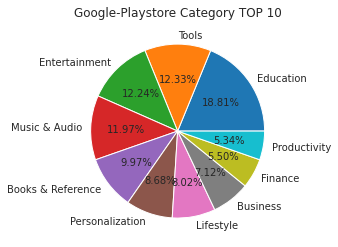

In [ ]:
cat_x = cate_count.index
cat_y = cate_count.values

plt.title("Google-Playstore Category TOP 10")
plt.pie(cat_y, labels = cat_x, autopct = '%1.2f%%', textprops = {'fontsize': 10})
plt.show()

In [ ]:
means = gps.groupby('Category').mean()
display(means.head())

,Rating,Installs Range,Installs,Free,Price,Minimum Android,Released,Last Updated,Ad Supported,In App Purchases,Editors Choice,Update,Size(k),Ranking
Category,,,,,,,,,,,,,,
Action,4.008759,837439.330900,1.483626e+06,0.975313,0.079034,3.924515,2018.065693,2019.064566,0.848318,0.338318,0.003323,0.438668,45836.962435,515537.564833
Adventure,4.077269,284596.348700,5.161681e+05,0.950506,0.214326,3.803313,2018.232670,2019.055672,0.804264,0.246996,0.001969,0.394120,39105.161043,536710.428678
Arcade,4.264831,451787.593017,8.001384e+05,0.984497,0.063298,3.829019,2017.856184,2018.764309,0.824175,0.249360,0.000554,0.382345,28764.644577,726170.485085
Art & Design,3.980241,119000.775220,1.945010e+05,0.990296,0.038398,4.041864,2018.672760,2019.556759,0.800045,0.073008,0.000564,0.468292,15525.690251,546096.903633
Auto & Vehicles,3.903198,54696.316330,9.988740e+04,0.980040,0.144703,4.355317,2018.209525,2019.784289,0.341076,0.079491,0.000117,0.666394,19696.548033,612355.172406


카테고리별 평점 평균

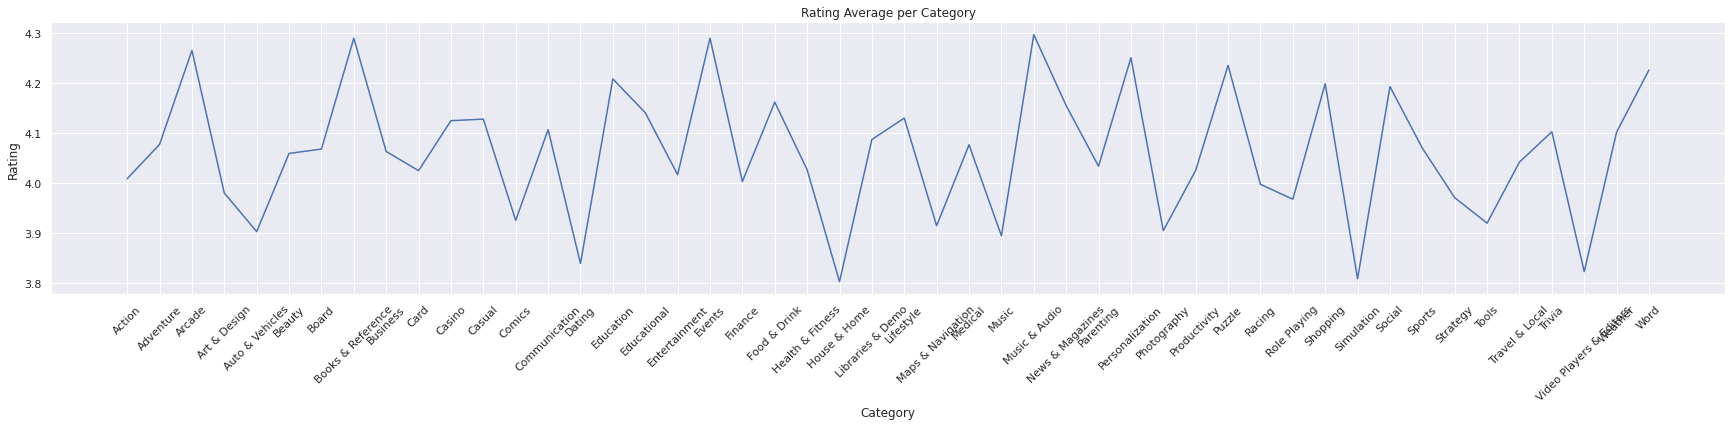

In [ ]:
sns.set(rc={'figure.figsize':(30, 5)}) 

plt.title("Rating Average per Category")
plt.xticks(rotation=45)
sns.lineplot(data = means, x = 'Category', y = 'Rating')

In [ ]:
released_count = gps['Released'].value_counts()
print(released_count) 

2020    238859
2019    215482
2018    177064
2017    151706
2016    108855
2015     83750
2021     57063
2014     56672
2013     34402
2012     21297
2011     12076
2010      3823
Name: Released, dtype: int64


연도별 출시앱 수 

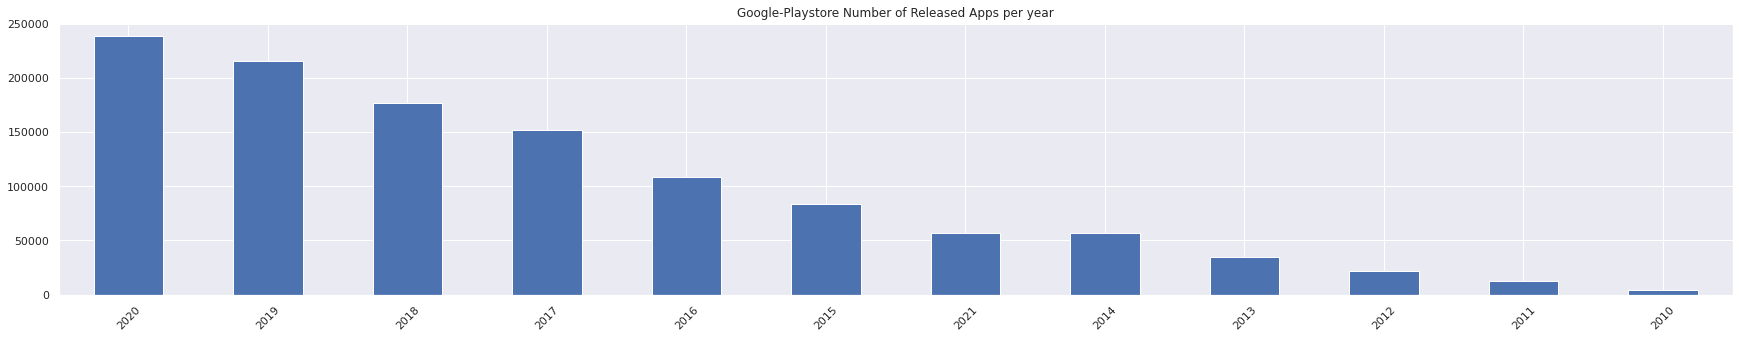

In [ ]:
plt.title("Google-Playstore Number of Released Apps per year")
plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=45)

released_count[:].plot.bar(rot=45)

In [ ]:
Ins_Cat = gps.groupby('Category')['Installs'].sum()
order_sorted = Ins_Cat.sort_values(ascending=False)[:10]
print(order_sorted)

Category
Tools            43002235378
Casual           25577081462
Action           25000573592
Arcade           23122399811
Entertainment    18549088756
Simulation       17640866953
Photography      17582810571
Productivity     16941038029
Puzzle           16893947180
Racing           14050087829
Name: Installs, dtype: int64


In [ ]:
education = gps.loc[gps['Category'] == 'Education']
entertainment = gps.loc[gps['Category'] == 'Entertainment']
casino = gps.loc[gps['Category'] == 'Casino']

In [ ]:
CR_count = gps['Content Rating'].value_counts()
print(CR_count) 

Everyone           1003696
Teen                102289
Mature 17+           34610
Everyone 10+         20252
Unrated                121
Adults only 18+         81
Name: Content Rating, dtype: int64


카테고리별 연령 그룹 알아보기

In [ ]:
Edu_CR = education['Content Rating'].value_counts()
Ent_CR = entertainment['Content Rating'].value_counts()
Casino_CR = casino['Content Rating'].value_counts()
print("Content Rating in Education\n")
print(Edu_CR)
print("\nContent Rating in Entertainment\n")
print(Ent_CR)
print("\nContent Rating in Casino\n")
print(Casino_CR)

Content Rating in Education

Everyone           117727
Teen                 3299
Everyone 10+          866
Mature 17+            491
Adults only 18+         3
Unrated                 3
Name: Content Rating, dtype: int64

Content Rating in Entertainment

Everyone           63775
Teen                9996
Mature 17+          4887
Everyone 10+         964
Unrated               24
Adults only 18+       18
Name: Content Rating, dtype: int64

Content Rating in Casino

Teen               3410
Everyone            212
Mature 17+           29
Adults only 18+       8
Everyone 10+          5
Name: Content Rating, dtype: int64


모든 앱의 권장연령 비율

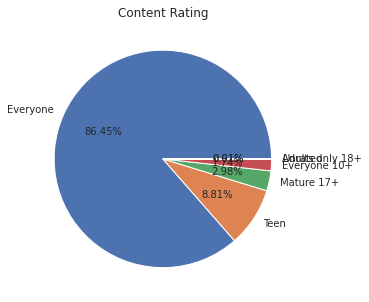

In [ ]:
cr_x = CR_count.index
cr_y = CR_count.values

plt.title("Content Rating")
plt.pie(cr_y, labels = cr_x, autopct = '%1.2f%%', textprops = {'fontsize': 10})
plt.show()

사이즈와 평점의 연관도를 예측하기 위한 산점도

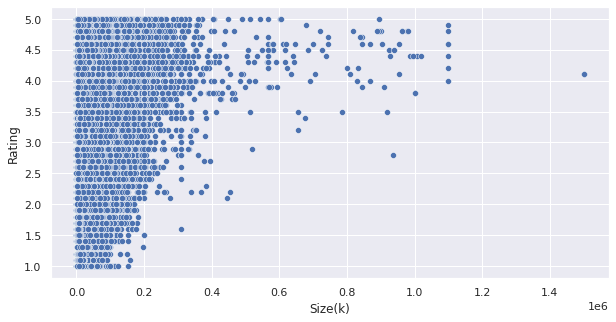

In [ ]:
sns.scatterplot(data = gps, x = 'Size(k)', y = 'Rating')

In [ ]:
CR_count = gps['Content Rating'].value_counts()
print(CR_count) 

Everyone           1003696
Teen                102289
Mature 17+           34610
Everyone 10+         20252
Unrated                121
Adults only 18+         81
Name: Content Rating, dtype: int64


##범주형 칼럼 레이블 인코딩

Category, Currency, Content Rating 인코딩 전 값

ex)카테고리

adventure=1

tools=42






In [ ]:
from sklearn.preprocessing import LabelEncoder

items = ['Tools', 'Communication', 'Libraries & Demo', 'Lifestyle',
       'Personalization', 'Racing', 'Travel & Local', 'Food & Drink',
       'Puzzle', 'Entertainment', 'Arcade', 'Maps & Navigation',
       'Auto & Vehicles', 'Health & Fitness', 'Shopping',
       'Books & Reference', 'Sports', 'Finance', 'Music & Audio',
       'News & Magazines', 'Casual', 'Productivity', 'Education',
       'Art & Design', 'House & Home', 'Business', 'Card', 'Events',
       'Trivia', 'Board', 'Social', 'Medical', 'Strategy', 'Word',
       'Photography', 'Beauty', 'Video Players & Editors', 'Action',
       'Simulation', 'Music', 'Adventure', 'Weather', 'Dating',
       'Role Playing', 'Comics', 'Educational', 'Casino', 'Parenting']

# LabelEncoder 객체 생성한 후, fit()과 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변화값: ', labels)

인코딩 변화값:  [42 13 23 24 31 35 43 20 34 17  2 25  4 21 37  7 40 19 28 29 11 33 15  3
 22  8  9 18 44  6 39 26 41 47 32  5 45  0 38 27  1 46 14 36 12 16 10 30]


In [ ]:
print('디코딩 원본값:',encoder.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47]))

디코딩 원본값: ['Action' 'Adventure' 'Arcade' 'Art & Design' 'Auto & Vehicles' 'Beauty'
 'Board' 'Books & Reference' 'Business' 'Card' 'Casino' 'Casual' 'Comics'
 'Communication' 'Dating' 'Education' 'Educational' 'Entertainment'
 'Events' 'Finance' 'Food & Drink' 'Health & Fitness' 'House & Home'
 'Libraries & Demo' 'Lifestyle' 'Maps & Navigation' 'Medical' 'Music'
 'Music & Audio' 'News & Magazines' 'Parenting' 'Personalization'
 'Photography' 'Productivity' 'Puzzle' 'Racing' 'Role Playing' 'Shopping'
 'Simulation' 'Social' 'Sports' 'Strategy' 'Tools' 'Travel & Local'
 'Trivia' 'Video Players & Editors' 'Weather' 'Word']


In [ ]:
gps['Currency'].unique()

array(['USD', 'VND', 'GBP', 'BRL', 'KRW', 'TRY', 'INR', 'SGD', 'EUR'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

items = ['USD', 'VND', 'GBP', 'BRL', 'KRW', 'TRY', 'INR', 'SGD', 'EUR']

# LabelEncoder 객체 생성한 후, fit()과 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변화값: ', labels)

인코딩 변화값:  [7 8 2 0 4 6 3 5 1]


In [ ]:
print('디코딩 원본 값: ', encoder.inverse_transform([0, 1, 2,3,4,5,6,7,8]))

디코딩 원본 값:  ['BRL' 'EUR' 'GBP' 'INR' 'KRW' 'SGD' 'TRY' 'USD' 'VND']


In [ ]:
gps['Content Rating'].unique()

array(['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

items = ['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+',
       'Adults only 18+', 'Unrated']

# LabelEncoder 객체 생성한 후, fit()과 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변화값: ', labels)

인코딩 변화값:  [1 4 3 2 0 5]


In [ ]:
print('디코딩 원본 값: ', encoder.inverse_transform([0, 1, 2,3,4,5]))

디코딩 원본 값:  ['Adults only 18+' 'Everyone' 'Everyone 10+' 'Mature 17+' 'Teen' 'Unrated']


In [ ]:
#레이블 인코딩
encoding_columns=['Category', 'Currency', 'Content Rating']
not_encoding_columns=['App Name','App Id','Rating',	'Rating Count',	'Minimum Installs','Maximum Installs','Free','Price','Size'	,'Minimum Android	Released','Last Updated','Ad Supported'	,'In App Purchases',	'Editors Choice',	'Update','unit''Size(k)', 'Ranking']

In [ ]:
for ecolumn in encoding_columns:
  labels=[]
  encoder = LabelEncoder()
  items=list(gps[ecolumn])
  encoder.fit(items)
  labels=encoder.transform(items)
  gps[ecolumn]=labels

gps.head()

,App Name,App Id,Category,Rating,Rating Count,Installs Range,Installs,Free,Price,Currency,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Update,Size(k),Ranking
1,Ampere Battery Info,com.webserveis.batteryinfo,42,4.4,64.0,5000.0,7662,1,0.0,7,5,2020,2021,1,True,0,0,1,2900.0,514983
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,13,5.0,5.0,10.0,19,1,0.0,7,4,2018,2018,1,True,0,0,0,1800.0,1157496
6,unlimited 4G data prank free app,getfreedata.superfatiza.unlimitedjiodataprank,23,4.5,12.0,1000.0,2567,1,0.0,7,4,2019,2019,1,True,0,0,0,2500.0,729913
7,The Everyday Calendar,com.mozaix.simoneboard,24,2.0,39.0,500.0,702,1,0.0,7,5,2019,2019,1,False,0,0,0,16000.0,959486
9,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,31,4.7,820.0,50000.0,62433,1,0.0,7,4,2019,2020,1,True,0,0,1,3500.0,209671


In [ ]:
gps=gps[['App Name', 'App Id', 'Category', 'Rating', 'Rating Count',
       'Installs Range', 'Installs', 'Free', 'Price', 'Currency',
       'Minimum Android', 'Released', 'Last Updated', 'Content Rating','In App Purchases', 'Editors Choice',
       'Update',  'Size(k)', 'Ranking',
       'Ad Supported']]

## 분류모델을 새 파일에서 돌리기 위해 전처리한 데이터를 csv 파일로 저장

In [ ]:
gps.to_csv('/content/drive/My Drive/Colab Notebooks/team_project/Google-Playstore3.csv', index=False)